### 掛載雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### import必要的套件

In [ ]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.font_manager as plt_font
folder="/content/drive/MyDrive/解密AI黑盒子分享/"
twfont1 = plt_font.FontProperties(fname=folder+"字型/kaiu.ttf")

### 從圖片檔案star7.jpg讀入資料，並劃出圖片

圖片高度： 300 
圖片寬度： 500 
顏色頻道： 3


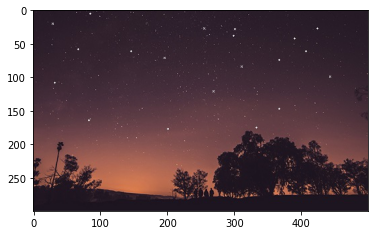

In [ ]:
image = mpimg.imread(folder+"資料集/star7.jpg")
print("圖片高度：",image.shape[0],"\n圖片寬度：",image.shape[1],"\n顏色頻道：",image.shape[2])
plt.imshow(image)

### (4)將圖片轉為灰階格式

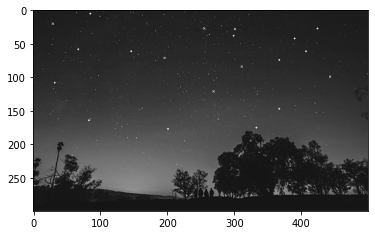

In [ ]:
#轉為灰階格式，RGB頻道所需權重
rgb_weights = [0.212671, 0.715160, 0.072169]
#將每一個像素的RGB數值乘以轉換權重
image_gray=np.dot(image[:,:,:3],rgb_weights)
plt.imshow(image_gray, cmap=plt.get_cmap("gray"))

### (5)設定卷積的濾鏡Filter(5x5矩陣)

In [ ]:
Filter = np.array([[1,-1,-1,-1,1],[-1,1,-1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[1,-1,-1,-1,1]])
print(Filter)

[[ 1 -1 -1 -1  1]
 [-1  1 -1  1 -1]
 [-1 -1  1 -1 -1]
 [-1  1 -1  1 -1]
 [ 1 -1 -1 -1  1]]


### (6)定義卷積層的卷積運算函數

In [ ]:
def conv(image):
  h, w = image.shape
  conv_out = np.zeros((h - 4, w - 4))
  for i in range(h - 4):
    for j in range(w - 4):
      im_region = image[i:(i + 5), j:(j + 5)]
      conv_out[i, j] = np.sum(im_region * Filter)
  return conv_out

### (7)定義池化層的MaxPooling運算(3X3矩陣)

### (8)執行卷積層處理及輸出圖象

卷積層的輸出圖象：
(296, 496)


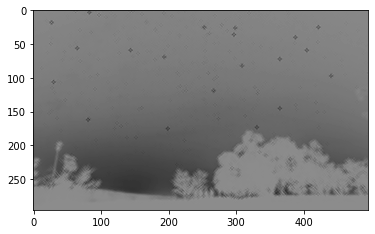

In [ ]:
conv_out=conv(image_gray)
print("卷積層的輸出圖象：")
plt.imshow(conv_out, cmap=plt.get_cmap("gray"))
print(conv_out.shape)

### (8)執行池化層處理及輸出圖象

池化層的輸出圖象：
(98, 165)


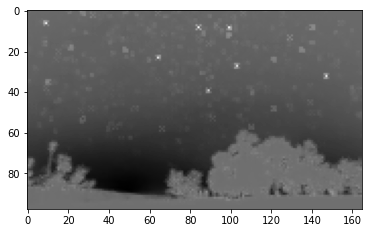

In [ ]:
print("池化層的輸出圖象：")
pool_out=pool(conv_out)
plt.imshow(pool_out, cmap=plt.get_cmap("gray"))
print(pool_out.shape)